In [5]:
!pip3 install opencv-python



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
maze_img = cv2.imread("C:/Users/KIIT/maze1.png")
maze_img = cv2.resize(maze_img, (160, 160))
maze_img.shape

(160, 160, 3)

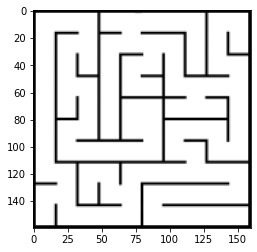

In [16]:
plt.imshow(maze_img)

In [ ]:
start_coord = tuple(map(int, input('Enter start co-ordinates (ranging (0,0) - (9,9)): ').split(' ')))
end_coord = tuple(map(int, input('Enter end co-ordinates (ranging (0,0) - (9,9)): ').split(' ')))
print('The start and end points respectively are: ', start_coord, end_coord)

In [ ]:
maze_copy = maze_img.copy()
maze_copy = cv2.cvtColor(maze_copy, cv2.COLOR_BGR2GRAY)


In [ ]:
kernel_1 = np.ones((7,7),np.uint8)    
erosion = cv2.erode(maze_copy, kernel_1, iterations = 1)  
kernel_2 = np.ones((3,3),np.uint8)
dilation = cv2.dilate(erosion, kernel_2, iterations = 1)
	
ret, thresh = cv2.threshold(dilation, 120, 255, cv2.THRESH_BINARY)

In [ ]:
def cell_work(cell):
    size = cell.shape

    # checking the presence of black pixel on the midpoint of each border
    west = bool(cell[int(size[0]/2),0] < 150) * 1
    north = bool(cell[0,int(size[1]/2)] < 150) * 2 
    east = bool(cell[int(size[0]/2), int(size[1]-1)] < 150) * 4
    south = bool(cell[int(size[0]-1) ,int(size[1]/2)] < 150) * 8
    
    # adding up all the weights to determine the cell value
    value = west+north+east+south     
    return value

In [ ]:
maze_array = []

for i in range(10):
    rows_val = []
    for j in range(10):
        cell = thresh[(16*i):(16*(i+1)), (16*j):(16*(j+1))]     # focusing on every cell by cropping it out of main image 
        v = cell_work(cell)         # storing the cell value into v 
        rows_val.append(v)          # appending the v into the rows_val
    maze_array.append(rows_val)
    
# print(maze_array)

In [ ]:
def find_path(maze_array, start_coord, end_coord):    
    # If path exist or not
    flag = 0  

    # For storing the path in the form of list
    path_array_list = []

    # tracker for the path_array_list
    p = 0

    temp_maze_array = np.copy(maze_array)

    # Appending the first coordinate to the list
    path_array_list.append(list(start_coord))

    while True:
        h,w = path_array_list[p][0], path_array_list[p][1]

        # If we reach the final point then we need to break the loop
        if path_array_list[-1]==list(end_coord):
            break

        # Open Downwards
        if 15 - temp_maze_array[h][w] > 7:
            temp_maze_array[h][w] += 8
            h=h+1
            path_array_list.append([h,w])
            temp_maze_array[h][w] += 2
            p=p+1

        # Open Rightwards
        elif 15 - temp_maze_array[h][w] > 3:
            temp_maze_array[h][w] += 4
            w=w+1
            path_array_list.append([h,w])
            temp_maze_array[h][w] += 1
            p=p+1

        # Open Upwards
        elif 15 - temp_maze_array[h][w] > 1:
            temp_maze_array[h][w] += 2
            h=h-1
            path_array_list.append([h,w])
            temp_maze_array[h][w] += 8
            p=p+1

        # Open Leftwards
        elif 15 - temp_maze_array[h][w] > 0:
            temp_maze_array[h][w] += 1
            w=w-1
            path_array_list.append([h,w])
            temp_maze_array[h][w] += 4
            p=p+1

        else:
            path_array_list.pop()
            if p != 0:
                p -=1
            else:
                # we reach the first element by backtracking
                path_array_list = None
                flag = 1
                break

    if flag == 0:
        path = []
        for i in path_array_list:
            path.append(tuple(i))


    return path

In [ ]:
final_path = find_path(maze_array, start_coord, end_coord)
print('Maze path is as follows: ', final_path)

In [ ]:
def drawPath(img, start_c, end_c, path):
    init_w = -8
    init_h = -8
    
    for i in range(len(path)-1):
        pt1 = path[i]
        pt2 = path[i+1]
        
        start = (((pt1[1]+1)*(16))+init_w, ((pt1[0]+1)*(16))+init_h)
        end = (((pt2[1]+1)*(16))+init_w, ((pt2[0]+1)*(16))+init_h)
        
        cv2.line(img, start, end, (255, 0, 0), 4)
    
    
    return img

In [ ]:
solved = drawPath(maze_img, start_coord, end_coord, final_path)

In [ ]:
print('The solved maze is as follows: ')
plt.imshow(solved)